In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import zipfile

# **Importing the model with pre-trained weights**

In [2]:
model = tf.keras.applications.ResNet50(weights = 'imagenet')

2021-11-25 23:35:45.861109: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-25 23:35:45.970278: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-25 23:35:45.971021: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-25 23:35:45.972184: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

102981632/102967424 [==============================] - 1s 0us/step


# **Tests with the pre-trained model**

In [3]:
train = '../input/cat-and-dog/null'


In [4]:
sample_image = tf.keras.preprocessing.image.load_img(r'../input/cat-and-dog/test_set/test_set/cats/cat.4003.jpg', target_size=(224,224))

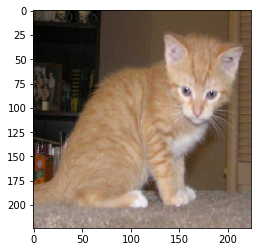

In [5]:
plt.imshow(sample_image)

In [6]:
type(sample_image)

PIL.Image.Image

In [7]:
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)

In [8]:
type(sample_image)

numpy.ndarray

In [9]:
np.shape(sample_image)

(224, 224, 3)

In [10]:
sample_image = np.expand_dims(sample_image, axis =0)

In [11]:
sample_image.shape

(1, 224, 224, 3)

In [12]:
sample_image.max()

255.0

In [13]:
sample_image.min()

0.0

In [14]:
sample_image = tf.keras.applications.resnet50.preprocess_input(sample_image)

In [15]:
sample_image.max()

151.061

In [16]:
sample_image.min()

-123.68

In [17]:
predictions = model.predict(sample_image)

2021-11-25 23:35:51.916774: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-25 23:35:53.591787: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


In [18]:
print('predictions: ', tf.keras.applications.resnet50.decode_predictions(predictions, top = 5))

49152/35363 [=========================================] - 0s 0us/step
predictions:  [[('n02123159', 'tiger_cat', 0.19831577), ('n02870880', 'bookcase', 0.1425976), ('n02971356', 'carton', 0.09335908), ('n02123045', 'tabby', 0.09267558), ('n02127052', 'lynx', 0.09115841)]]


# **Transfer learning and model reuse**

In [19]:
base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False)

94781440/94765736 [==============================] - 0s 0us/step


In [20]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [21]:
x = base_model.output

In [22]:
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [23]:
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(2, activation='sigmoid')(x)

In [24]:
model = tf.keras.models.Model(inputs = base_model.input, outputs = preds)

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [26]:
for i, layer in enumerate(model.layers):
  print(i, layer.name)

0 input_2
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [27]:
for layer in model.layers[:175]:
  layer.trainable = False

In [28]:
for layer in model.layers[175:]:
  layer.trainable = True

In [29]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [30]:
train_generator = train_datagen.flow_from_directory('../input/cat-and-dog',
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    shuffle = True)

Found 10028 images belonging to 2 classes.


In [31]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit_generator(generator=train_generator,
                              epochs = 30)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
314/314 [==============================] - 84s 258ms/step - loss: 0.5359 - accuracy: 0.7983
Epoch 2/30
314/314 [==============================] - 45s 144ms/step - loss: 0.5067 - accuracy: 0.7983
Epoch 3/30
314/314 [==============================] - 44s 140ms/step - loss: 0.5040 - accuracy: 0.7983
Epoch 4/30
314/314 [==============================] - 44s 139ms/step - loss: 0.5023 - accuracy: 0.7979
Epoch 5/30
314/314 [==============================] - 43s 138ms/step - loss: 0.4972 - accuracy: 0.7981
Epoch 6/30
314/314 [==============================] - 44s 140ms/step - loss: 0.4888 - accuracy: 0.7987
Epoch 7/30
314/314 [==============================] - 44s 141ms/step - loss: 0.4808 - accuracy: 0.7995
Epoch 8/30
314/314 [==============================] - 43s 138ms/step - loss: 0.4685 - accuracy: 0.8011
Epoch 9/30
314/314 [==============================] - 46s 147ms/step - loss: 0.4530 - accuracy: 0.8049
Epoch 10/30
314/314 [==============================] - 44s 141ms/step - l

# **Model evaluation**

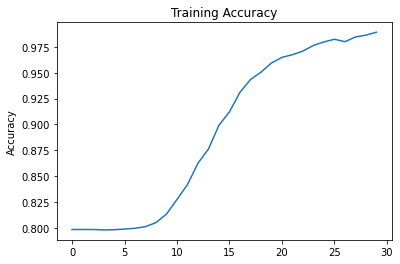

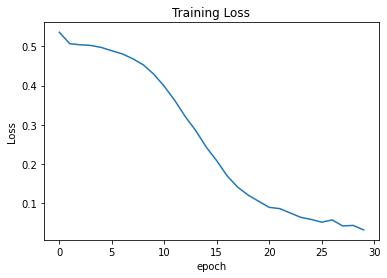

In [33]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure()
plt.plot(acc, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.figure()

plt.plot(loss, label='Training Loss')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

In [34]:
sample_image = tf.keras.preprocessing.image.load_img(r'../input/cat-and-dog/test_set/test_set/cats/cat.4012.jpg', target_size=(224,224))

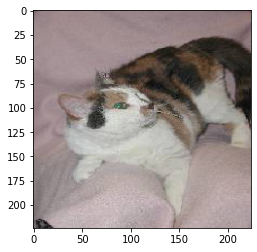

In [35]:
plt.imshow(sample_image)

In [36]:
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)
np.shape(sample_image)

(224, 224, 3)

In [37]:
sample_image = np.expand_dims(sample_image, axis = 0)
np.shape(sample_image)

(1, 224, 224, 3)

In [38]:
sample_image = tf.keras.applications.resnet50.preprocess_input(sample_image)

In [39]:
predictions = model.predict(sample_image)
print(predictions)

[[0.8219402  0.18244293]]


The chances of being classified as a cat is over 70% and a dog is practically 0%

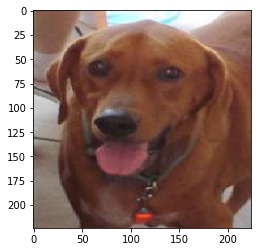

In [40]:
sample_image = tf.keras.preprocessing.image.load_img(r'../input/cat-and-dog/test_set/test_set/dogs/dog.4014.jpg', target_size=(224,224))
plt.imshow(sample_image)

In [41]:
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)
sample_image = np.expand_dims(sample_image, axis = 0)
sample_image = tf.keras.applications.resnet50.preprocess_input(sample_image)
predictions = model.predict(sample_image)
print(predictions)

[[9.999999e-01 8.226499e-08]]


The chance of being classified as a cat is almost 0% and a dog over 95%.

Initially I did the training with 10 epochs, but I saw the possibility of increasing them, as it was possible to improve the algorithm, we could still increase the epochs, but it would take a long time for this study.

when activating the network, I performed the test with softmax, but because we are looking for only two classes, I opted for sigmoid.

# **If you find this notebook useful, support with an upvote** 👍